# t-SNE 範例

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [1]:
#!pip3 install --user sklearn
#!pip3 install --user --upgrade matplotlib

載入套件

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets

%matplotlib inline

載入 digits (4個數字) 資料集

In [3]:
digits = datasets.load_digits(n_class=4)
X = digits.data
y = digits.target

設定 模型 估計參數

#### TSNE (t-distributed Stochastic Neighbor Embedding) 適合針對非線性結構資料(文字、影像)<br>
##### 核心概念: 計算每個與鄰居之間的高斯(T)機率分布,從高維近似至低維, 再以Gradient Descent 優化Kullback–Leibler divergence求得最佳解
##### 對於新資料是無法分類處理的, 所以TSNE通常只適合拿來做資料視覺化, 無法用在訓練驗證<br>
- n_components: default(2) 特徵下降至多少維度<br><br>
- early_exaggeration: default(12) 決定在新空間維度中,原本兩clusters之間的距離,愈大的話在新空間兩個cluster距離愈遠。(如果cost在初始優化階段就不斷上升代表early_exaggeration或是learning_rate太高所造成)<br><br>
- learning_rate: default(200) 一般介於 [10.0, 1000.0]之間。(學習率太高會造成點與鄰居點之間像球一樣,距離都一致;如果太低則點與點之間將壓縮聚集在一起)<br><br>
- init: default(random) 先以甚麼樣的方式降維,再進行高斯機率函數(高維)&T分布(低維)進行近似優化。因為直接從高維度計算與維度的相似度會耗費太多計算時間, 所以先以其他方式降維後在近似會比較快速<br><br>
- perplexity代表鄰居的影響力 (作者說到如果perplexity=30 代表計算某點附近30個鄰居的高斯機率分布)
    * 數值愈小 代表 近鄰居才會影響 容易散成多堆多群(同一國可能被拆開)
    * 數值愈大 代表 向心力愈強 容易聚集在一起
    * 當資料量多時,建議使用較高的perplexity讓相近的點聚集在一起
    
[Visualizing Data using t-SNE GoogleTechTalks](https://www.youtube.com/watch?v=RJVL80Gg3lA)<br>
[Unsupervised Learning 李弘毅](https://www.youtube.com/watch?v=GBUEjkpoxXc)

In [4]:
n_samples, n_features = X.shape
n_neighbors = 30
tsne = manifold.TSNE(n_components=2, random_state=0, init='pca', learning_rate=200., early_exaggeration=12.)

資料建模 並 視覺化 結果

Computing t-SNE embedding


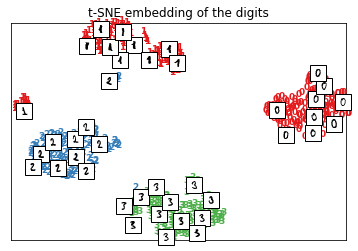

In [5]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    #Normalization
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]): #訓練集數目
        plt.text(X[i, 0], X[i, 1], str(y[i]), #文字位置為降維成2維後的數值位置
                 color=plt.cm.Set1(y[i] / 10.), #cm.Set1(數字) 不同的數字會給予不同的顏色數值(四個數值) 相同數字會有相同顏色
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'): #確認offsetbox有沒有 AnnotationBbox這個屬性
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1) #計算每個訓練樣本之間的距離
            if np.min(dist) < 4e-3:
                # don't show points that are too close 太靠近跳過不進行標示
                continue
            shown_images = np.r_[shown_images, [X[i]]] #新增剛剛計算的距離 np.r 保持相同row 串接資料 增加column
            
            #如果距離合適,進行數字標示
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), #OffsetImage(圖array, cmap, 座標)
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")

X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits")

plt.show()

# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [6]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [7]:
from sklearn import manifold

num, features = X.shape
print(X.shape)
tsne = manifold.TSNE(n_components=2, early_exaggeration=12, learning_rate=200, init='pca', random_state=25)

(1797, 64)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
%matplotlib inline

def plot_embedding(X, title=None):
    #Normalization 針對每個特徵Scaling
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X =  (X - x_min) / (x_max - x_min)
    
    plt.figure()
    ax = plt.subplot(111)
    #小數字分布
    for i in range(num):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color = plt.cm.Set1(y[i]/10), fontdict={'weight':'bold', 'size':9})
    
    #大數字標示
    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1,1]]) #(1,2)
        for i in range(num):
            
            #np.sum(X)全加總輸出一個數字  np.sum(X,0)每個col加總輸出兩個數字  np.sum(X,1)每個row加總輸出一個數字
            dist = np.sum((X[i] - shown_images)**2, 1) #(1,2) - (1,2) ... (1,2) - (1797,2)
            
            if np.min(dist) < 4e-3:
                continue
                
            shown_images = np.r_[shown_images, [X[i]]] #(1,2) -> (2,2) ...(1797,2)
            
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(digits.images[i], cmap = plt.cm.gray_r), X[i])
            ax.add_artist(imagebox)
            
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

Computing t-SNE embedding


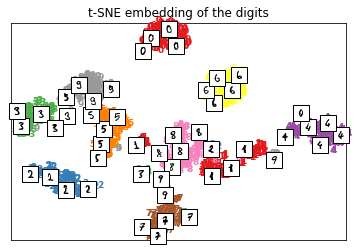

In [9]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")

X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "t-SNE embedding of the digits")